# MNIST Image Classifier

## Objective
The aim of this article is to perform image recognition of handwritten numbers, so that given a picture, the model can tell which digit is written.

## Install depedencies

In [ ]:
!pip install -Uqq fastai Pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 9.5 MB/s eta 0:00:00


First, import all the packages

In [ ]:
from fastai.vision.all import *
from PIL import Image
import matplotlib.pyplot as plt

## Download Dataset

We are using the MNIST dataset from the FastAI URLs

In [ ]:
path = untar_data(URLs.MNIST)

## Create Dataloader

In [ ]:
dls = ImageDataLoaders.from_folder(
    path,
    train='training',
    valid='testing',
    valid_pct=0.2,
    item_tfms=Resize(28)
)

## Training

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 180MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.707112,0.492397,0.156000,01:52


epoch,train_loss,valid_loss,error_rate,time
0,0.119640,0.070277,0.022000,01:53
1,0.056780,0.040329,0.013500,01:53
2,0.032065,0.032553,0.010214,01:53


## Inference

In [ ]:
def classify_image(img):
    img = Image.fromarray(img)
    _, idx, probs = learn.predict(img)
    predicted_number = int(idx)
    probability = float(probs[predicted_number])
    return {
        "predicted_number": predicted_number,
        "probability": probability
    }

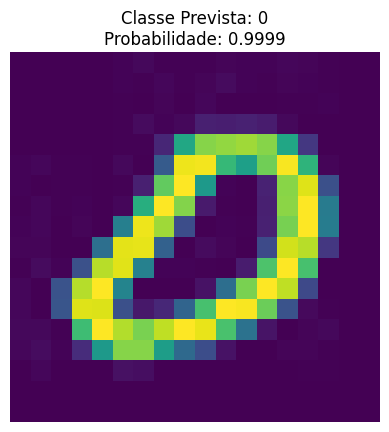

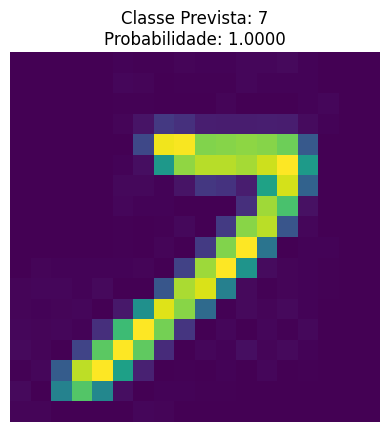

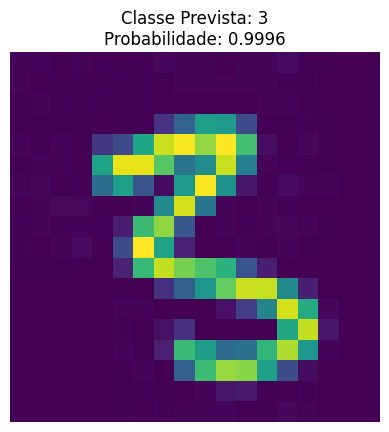

In [ ]:
exemplo_paths = ["/content/exemplo1.jpg", "/content/exemplo2.jpg", "/content/exemplo3.jpg"]

for img_path in exemplo_paths:
    img = Image.open(img_path)

    _, pred_idx, pred_probs = learn.predict(img)
    pred_class = learn.dls.vocab[pred_idx]
    predicted_probability = pred_probs[pred_idx.item()].item()

    img_thumb = Image.open(img_path).to_thumb(18, 18)

    plt.imshow(img_thumb)
    plt.title(f"Classe Prevista: {pred_class}\nProbabilidade: {predicted_probability:.4f}")
    plt.axis('off')
    plt.show()
    print('\n')

## Exporting

In [ ]:
learn.export('/content/model.pkl')

## Deploy no Hugging Face

[Link](https://huggingface.co/spaces/luisgaboardi/MNIST)